In [1]:
# Import Libraries
import matplotlib
matplotlib.use('TkAgg')
from matplotlib import rc
import matplotlib.pyplot as plt
from astropy.io import fits
import numpy as np
import scipy
from scipy import ndimage
from matplotlib.lines import Line2D
from pylab import *
from scipy.optimize import curve_fit
from scipy import asarray as ar,exp
from numpy import histogram2d as histogram2d
from numpy import sqrt, pi, exp, loadtxt
from lmfit import Model
from matplotlib.colors import LogNorm
from matplotlib import contour
from copy import deepcopy

In [2]:
# Read data

r= fits.open('NGC628_regions_rayons.fits')
r.info()
ra = r[0].data
r.close()

sigma= fits.open('NGC628_voigt_sigma.fits')
sigma.info()
sig = sigma[0].data
sigma.close()

gr= fits.open('NGC628_HIIPhot3_All_GROW.fits')
gr.info()
grow = gr[0].data
gr.close()

med = fits.getdata('NGC628_background.regions.fits')

flux_tot = fits.getdata('NGC628_flux_tot_regions.fits')

dis = fits.open('NGC628_distance_grow.fits')
dis.info()
d = dis[0].data
dis.close()

ahdu_list1 = fits.open('NGC628_SN3_1.0.LineMaps.map.6563.amplitude.clean.fits')
ahdu_list1.info()
aimage_dataha = ahdu_list1[0].data
ahdu_list1.close()

ahdu_list2 = fits.open('NGC628_SN3_1.0.LineMaps.map.6583.amplitude.clean.fits')
ahdu_list2.info()
aimage_datan2 = ahdu_list2[0].data
ahdu_list2.close()

fhdu_list1 = fits.open('NGC628_SN3_1.0.LineMaps.map.6563.fwhm.clean.fits')
fhdu_list1.info()
fimage_dataha = fhdu_list1[0].data
fhdu_list1.close()

fhdu_list2 = fits.open('NGC628_SN3_1.0.LineMaps.map.6583.fwhm.clean.fits')
fhdu_list2.info()
fimage_datan2 = fhdu_list2[0].data
fhdu_list2.close()
                
# Read Fits Data and Data Header
ahdu_list1 = fits.open('NGC628_SN2_1.0.LineMaps.map.5007.amplitude.clean.int3.fits')
ahdu_list1.info()
aimage_datao3 = ahdu_list1[0].data
ahdu_list1.close()

ahdu_list2 = fits.open('NGC628_SN2_1.0.LineMaps.map.4861.amplitude.clean.int3.fits')
ahdu_list2.info()
aimage_datahb = ahdu_list2[0].data
ahdu_list2.close()

fhdu_list1 = fits.open('NGC628_SN2_1.0.LineMaps.map.5007.fwhm.clean.int3.fits')
fhdu_list1.info()
fimage_datao3 = fhdu_list1[0].data
fhdu_list1.close()

fhdu_list2 = fits.open('NGC628_SN2_1.0.LineMaps.map.4861.fwhm.clean.int3.fits')
fhdu_list2.info()
fimage_datahb = fhdu_list2[0].data
fhdu_list2.close()

ahdu_list22 = fits.open('NGC628_SN3_1.0.LineMaps.map.6716.amplitude.clean.fits')
ahdu_list22.info()
aimage_datas21 = ahdu_list22[0].data
ahdu_list22.close()

ahdu_list33 = fits.open('NGC628_SN3_1.0.LineMaps.map.6731.amplitude.clean.fits')
ahdu_list33.info()
aimage_datas22 = ahdu_list33[0].data
ahdu_list33.close()

fhdu_list22 = fits.open('NGC628_SN3_1.0.LineMaps.map.6716.fwhm.clean.fits')
fhdu_list22.info()
fimage_datas21 = fhdu_list22[0].data
fhdu_list22.close()

fhdu_list33 = fits.open('NGC628_SN3_1.0.LineMaps.map.6731.fwhm.clean.fits')
fhdu_list33.info()
fimage_datas22 = fhdu_list33[0].data
fhdu_list33.close()
                                        

ahdu_list222 = fits.open('NGC628_SN1_1.0.LineMaps.map.3727.flux.extcor.clean.int33.fits')
ahdu_list222.info()
aimage_datao2 = ahdu_list222[0].data
ahdu_list222.close()

ahdu_list333 = fits.open('NGC628_SN2_1.0.LineMaps.map.4861.flux.extcor.clean.int33.fits')
ahdu_list333.info()
aimage_datahbe = ahdu_list333[0].data
ahdu_list333.close()

ahdu_list222 = fits.open('NGC628_SN2_1.0.LineMaps.map.5007.flux.extcor.clean.int33.fits')
ahdu_list222.info()
aimage_datao3e = ahdu_list222[0].data
ahdu_list222.close()



s = fits.open('stars.fits')
s.info()
image_s = s[0].data
s.close()
#aimage_datao3[np.where(aimage_datao3 < 0)] = 0
#aimage_datao3e[np.where(aimage_datao3e < 0)] = 0
#aimage_datao2[np.where(aimage_datao2 < 0)] = 0
#aimage_datahb[np.where(aimage_datahb < 0)] = 0
#fimage_datao3[np.where(fimage_datao3 < 0)] = 0
#fimage_datahb[np.where(fimage_datahb < 0)] = 0
#aimage_datan2[np.where(aimage_datan2 < 0)] = 0
#fimage_datan2[np.where(aimage_datan2 < 0)] = 0  
#aimage_dataha[np.where(aimage_datan2 < 0)] = 0
#fimage_dataha[np.where(aimage_datan2 < 0)] = 0 
#aimage_datas21[np.where(aimage_datas21 < 0)] = 0
#aimage_datas22[np.where(aimage_datas22 < 0)] = 0
#fimage_datas21[np.where(aimage_datas21 < 0)] = 0
#fimage_datas22[np.where(aimage_datas22 < 0)] = 0
#aimage_datahbe[np.where(aimage_datahbe < 0)] = 0
#aimage_datao2[np.where(aimage_datao2 < 0)] = 0
#                      

Filename: NGC628_regions_rayons.fits
No.    Name         Type      Cards   Dimensions   Format
0    PRIMARY     PrimaryHDU       5   (4285,)      float64   
Filename: NGC628_voigt_sigma.fits
No.    Name         Type      Cards   Dimensions   Format
0    PRIMARY     PrimaryHDU       5   (4285,)      float64   
Filename: NGC628_HIIPhot3_All_GROW.fits
No.    Name         Type      Cards   Dimensions   Format
0    PRIMARY     PrimaryHDU      71   (2048, 2064)   float32   
Filename: NGC628_distance_grow.fits
No.    Name         Type      Cards   Dimensions   Format
0    PRIMARY     PrimaryHDU       9   (2048, 2064)   float32   
Filename: NGC628_SN3_1.0.LineMaps.map.6563.amplitude.clean.fits
No.    Name         Type      Cards   Dimensions   Format
0    PRIMARY     PrimaryHDU      71   (2048, 2064)   float32   
Filename: NGC628_SN3_1.0.LineMaps.map.6583.amplitude.clean.fits
No.    Name         Type      Cards   Dimensions   Format
0    PRIMARY     PrimaryHDU      71   (2048, 2064)   float32 

Filename: NGC628_SN2_1.0.LineMaps.map.5007.amplitude.clean.int3.fits
No.    Name         Type      Cards   Dimensions   Format
0    PRIMARY     PrimaryHDU      71   (2048, 2064)   float32   
Filename: NGC628_SN2_1.0.LineMaps.map.4861.amplitude.clean.int3.fits
No.    Name         Type      Cards   Dimensions   Format
0    PRIMARY     PrimaryHDU      71   (2048, 2064)   float32   
Filename: NGC628_SN2_1.0.LineMaps.map.5007.fwhm.clean.int3.fits
No.    Name         Type      Cards   Dimensions   Format
0    PRIMARY     PrimaryHDU      71   (2048, 2064)   float32   
Filename: NGC628_SN2_1.0.LineMaps.map.4861.fwhm.clean.int3.fits
No.    Name         Type      Cards   Dimensions   Format
0    PRIMARY     PrimaryHDU      71   (2048, 2064)   float32   
Filename: NGC628_SN3_1.0.LineMaps.map.6716.amplitude.clean.fits
No.    Name         Type      Cards   Dimensions   Format
0    PRIMARY     PrimaryHDU      71   (2048, 2064)   float32   
Filename: NGC628_SN3_1.0.LineMaps.map.6731.amplitude.clean.f

In [3]:
n2h = np.zeros(4285)
fn2h = np.zeros(4285)

#o3h = np.zeros(4285)
#o2h = np.zeros(4285)
#s2h = np.zeros(4285)
#s2s2 = np.zeros(4285)
#n2s2 = np.zeros(4285)
#o3n2 = np.zeros(4285)
#o2n2 = np.zeros(4285)
#o2o3h = np.zeros(4285)

fn2h = aimage_datan2/aimage_dataha

for i in range(1,4284):

    n2h[i-1] = np.median(fn2h[(grow == i) & (d < 20)])
    
    

//anaconda/lib/python2.7/site-packages/numpy/lib/function_base.py:3569: RuntimeWarning: Invalid value encountered in median
  RuntimeWarning)
//anaconda/lib/python2.7/site-packages/numpy/core/_methods.py:59: RuntimeWarning: Mean of empty slice.
  warnings.warn("Mean of empty slice.", RuntimeWarning)


IndexError: index 4285 is out of bounds for axis 0 with size 4285

In [6]:
print ra[1000]/1000
print np.log10(n2h[0])


4.52209228516
nan


In [5]:
fit = np.polyfit(ra[(np.log10(flux_tot) > -15)]/1000, np.log10(n2h[(np.log10(flux_tot) > -15)]),4)
print fit
fitt = np.poly1d(fit)
print fitt

[ nan  nan  nan  nan  nan]
     4       3       2
nan x + nan x + nan x + nan x + nan


<IPython.core.display.Javascript object>


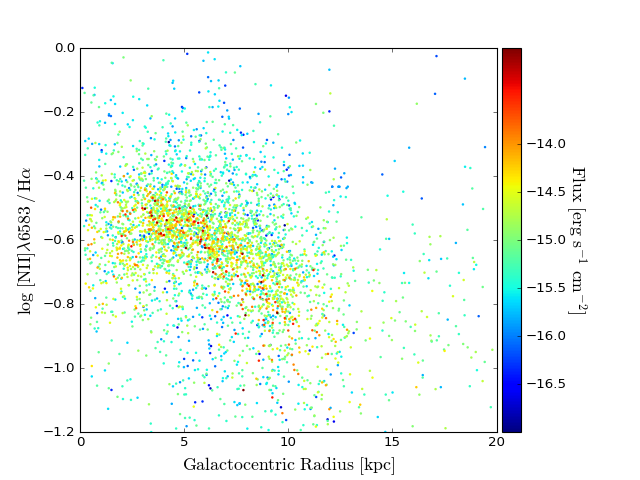

In [7]:
%matplotlib nbagg

cmin = -17.0
cmax = -13.0
plt.scatter(ra[(np.log10(flux_tot) < -16.5) & (np.log10(flux_tot) > -17)]/1000, np.log10(n2h[(np.log10(flux_tot) < -16.5) & (np.log10(flux_tot) > -17)]), marker='.', c=np.log10(flux_tot[(np.log10(flux_tot) < -16.5) & (np.log10(flux_tot) > -17)]), linewidths = 0.0, s = 20)
plt.clim(cmin,cmax)
plt.scatter(ra[(np.log10(flux_tot) < -16) & (np.log10(flux_tot) > -16.5)]/1000, np.log10(n2h[(np.log10(flux_tot) < -16) & (np.log10(flux_tot) > -16.5)]) , marker='.', c=np.log10(flux_tot[(np.log10(flux_tot) < -16) & (np.log10(flux_tot) > -16.5)]), linewidths = 0.0, s = 20)
plt.clim(cmin,cmax)
plt.scatter(ra[(np.log10(flux_tot) < -15.5) & (np.log10(flux_tot) > -16)]/1000, np.log10(n2h[(np.log10(flux_tot) < -15.5) & (np.log10(flux_tot) > -16)]) , marker='.', c=np.log10(flux_tot[(np.log10(flux_tot) < -15.5) & (np.log10(flux_tot) > -16)]), linewidths = 0.0, s = 20)
plt.clim(cmin,cmax)
plt.scatter(ra[(np.log10(flux_tot) < -15) & (np.log10(flux_tot) > -15.5)]/1000, np.log10(n2h[(np.log10(flux_tot) < -15) & (np.log10(flux_tot) > -15.5)]) , marker='.', c=np.log10(flux_tot[(np.log10(flux_tot) < -15) & (np.log10(flux_tot) > -15.5)]), linewidths = 0.0, s = 20)
plt.clim(cmin,cmax)
plt.scatter(ra[(np.log10(flux_tot) < -14.5) & (np.log10(flux_tot) > -15)]/1000, np.log10(n2h[(np.log10(flux_tot) < -14.5) & (np.log10(flux_tot) > -15)]) , marker='.', c=np.log10(flux_tot[(np.log10(flux_tot) < -14.5) & (np.log10(flux_tot) > -15)]), linewidths = 0.0, s = 20)
plt.clim(cmin,cmax)
plt.scatter(ra[(np.log10(flux_tot) < -14) & (np.log10(flux_tot) > -14.5)]/1000, np.log10(n2h[(np.log10(flux_tot) < -14) & (np.log10(flux_tot) > -14.5)]) , marker='.', c=np.log10(flux_tot[(np.log10(flux_tot) < -14) & (np.log10(flux_tot) > -14.5)]), linewidths = 0.0, s = 20)
plt.clim(cmin,cmax)
plt.scatter(ra[(np.log10(flux_tot) > -14)]/1000, np.log10(n2h[(np.log10(flux_tot) > -14)]), marker='.', c=np.log10(flux_tot[(np.log10(flux_tot) > -14)]), linewidths = 0.0, s = 20)
plt.clim(cmin,cmax)
# Show the boundary between the regions:
#plt.plot(np.arange(130.)/40-3, 0.72/(np.arange(130.)/40-3.32) + 1.3, linestyle='--', color='k')
#plt.plot(np.arange(135.)/40-0.3, 1.89*(np.arange(135.)/40-0.3) + 0.76, color='k')
#plt.plot(yys(np.arange(250.)/40-4),np.arange(250.)/40-4, color='r')    

cbar=plt.colorbar(ticks=[-16.5,-16, -15.5,-15,-14.5,-14],pad=0.01)
cbar.set_label('$\mathrm{Flux\,\,[erg\,\,s^{-1}\,\,cm^{-2}]}$', rotation=270, fontsize=16, fontname = 'Helvetica', labelpad=20)
plt.clim(cmin,cmax)
#plt.plot(np.arange(25),fitt(np.arange(25)), color='k', linewidth=1.5)
#plt.plot(np.arange(25),fitt(np.arange(25))+0.5, '--k')
#plt.plot(np.arange(25),fitt(np.arange(25))-0.5, '--k')
#plt.annotate('y='+'{:05.4f}'.format(fitt[0])+'{:05.4f}'.format(fitt[1])+'x'+'+'+'{:05.4f}'.format(fitt[2])+'x$^2$'+'{:05.4f}'.format(fitt[3])+'x$^3$'+'+'+'{:07.6f}'.format(fitt[4])+'x$^4$', xy=(0.08,0.03),xycoords='axes fraction',\
           # fontsize=12.0, color='k', backgroundcolor='w')
plt.xlabel('$\mathrm{Galactocentric\,\,Radius\,\,[kpc]}$', fontsize=16, fontname = 'Helvetica')
plt.ylabel(r'$\mathrm{log\,\,[NII]\lambda6583\,/\,H\alpha}$', fontsize=16, fontname = 'Helvetica')
plt.xlim(0,20)
plt.ylim(-1.2,0)
plt.show()    

In [10]:
#Save the Plot in a .eps or .png file
#plt.savefig('NGC628_BPT_flux.eps')
plt.savefig('NGC628_NIIHa_rayon.pdf', transparent=True, bbox_inches='tight', pad_inches=0.04)